# 1. Introduction

First of all, I got the **Social Buzz** client brief regarding their business needs. They had 3 main expectations from this project with **Accenture**. One of those falls within the responsibility of a Data Analytics team, where I am playing the role of the data analyst. Following, I had a meeting introducing me to the internal stakeholders.
Lastly, I got a data model from the client: <br>
<img src="data_model.jpg" alt="data model" width="400" align="left"/>
<br>
<br>
<br>
From all these, I need only 3 data tables: "Reaction, Content, and ReactionTypes" to find the **top 5 content categories with the largest aggregate popularity** for the client.

# 2. Data Cleaning

I have downloaded the given data tables in csv format.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cnt = pd.read_csv('Content.csv')
rct = pd.read_csv('Reactions.csv')
rtp = pd.read_csv('ReactionTypes.csv')

In [3]:
print(cnt.shape)
cnt.head(3)

(1000, 6)


,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...


In [4]:
print(rct.shape)
rct.head(3)

(25553, 5)


,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


In [5]:
print(rtp.shape)
rtp.head(3)

(16, 4)


,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0


### Retireve the necessary columns only

In [6]:
cnt = cnt[['Content ID','User ID','Type','Category']]
rct = rct[['Content ID','User ID','Type','Datetime']]
rtp=rtp[['Type','Sentiment','Score']]

### Handle null values first

In [7]:
print("In the 'Content' table:\n\n", cnt.isnull().sum(), "\n")
print("In the 'Reaction' table:\n\n", rct.isnull().sum(), "\n")
print("In the 'ReactionTypes' table:\n\n", rtp.isnull().sum(), "\n")

In the 'Content' table:

 Content ID    0
User ID       0
Type          0
Category      0
dtype: int64 

In the 'Reaction' table:

 Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64 

In the 'ReactionTypes' table:

 Type         0
Sentiment    0
Score        0
dtype: int64 



**Drop entries that has null values**

In [8]:
rct.dropna(axis = 0, inplace = True)

In [9]:
rct.shape

(22534, 4)

### Checking the data types for the tables and making changes if necessary

In [10]:
print(cnt.info())
print(rct.info())
print(rtp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  22534 non-null  object
 1   User ID     22534 non-null  object
 2   Type        22534 non-null  object
 3   Datetime    22534 non-null  object
dtypes: object(4)
memory usage: 880.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     ob

In [11]:
rct['Datetime'] = pd.to_datetime(rct['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [12]:
cnt[['Type']] = cnt[['Type']].astype('category')
cnt[['Category']] = cnt[['Category']].astype('category')
rct[['Type']] = rct[['Type']].astype('category')
rtp[['Type']] = rtp[['Type']].astype('category')
rtp[['Sentiment']] = rtp[['Sentiment']].astype('category')

### Elements in the important category type columns

In [13]:
def show_unique_elements(table, name):
    for column in table.columns.tolist():
        if column in ['Type', 'Category', 'Sentiment']:
            unique_elements = sorted(table[column].unique())
            print(f">>> In the {column} column of {name} table:")
            for x in unique_elements:
                print(x)
    print("\n")

show_unique_elements(cnt, "Content")
show_unique_elements(rct, "Reaction")
show_unique_elements(rtp, "ReactionTypes")


>>> In the Type column of Content table:
GIF
audio
photo
video
>>> In the Category column of Content table:
"animals"
"cooking"
"culture"
"dogs"
"food"
"public speaking"
"science"
"soccer"
"studying"
"technology"
"tennis"
"veganism"
Animals
Culture
Education
Fitness
Food
Healthy Eating
Public Speaking
Science
Soccer
Studying
Technology
Travel
Veganism
animals
cooking
culture
dogs
education
fitness
food
healthy eating
public speaking
science
soccer
studying
technology
tennis
travel
veganism


>>> In the Type column of Reaction table:
adore
cherish
disgust
dislike
hate
heart
indifferent
interested
intrigued
like
love
peeking
scared
super love
want
worried


>>> In the Type column of ReactionTypes table:
adore
cherish
disgust
dislike
hate
heart
indifferent
interested
intrigued
like
love
peeking
scared
super love
want
worried
>>> In the Sentiment column of ReactionTypes table:
negative
neutral
positive




**In the Category column of Content table, some names are repeated with quoted commas and different letter cases. Let's fix this!**

In [14]:
cnt['Category'] = cnt['Category'].str.replace('"', '').str.lower()

In [15]:
unique_elements = sorted(cnt['Category'].unique())
for x in unique_elements:
    print(x)

animals
cooking
culture
dogs
education
fitness
food
healthy eating
public speaking
science
soccer
studying
technology
tennis
travel
veganism


### Remove duplicate entries

In [16]:
cnt = cnt.drop_duplicates()
rct = rct.drop_duplicates()
rtp = rtp.drop_duplicates()

# 3. Data Modeling

Taking Reaction table `rct` as the base table.

First, let's join the `rct` table with `rtp` (ReactionTypes) table on reaction `Type` to create new dataframe `mydata`

In [17]:
mydata = pd.merge(rct, rtp, on='Type', how='left')
mydata.head(3)

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15


Now, left join this `mydata` with `cnt` (Content) table on `Content ID` and update `mydata`

In [18]:
mydata = pd.merge(mydata, cnt, on='Content ID', how='left')
mydata.head(3)

,Content ID,User ID_x,Type_x,Datetime,Sentiment,Score,User ID_y,Type_y,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying


It's necessary to rename some columns!

In [19]:
mydata = mydata.rename(columns={'User ID_x': 'Reaction User ID', 'Type_x':'Reaction Type',  'Datetime':'Reaction DateTime', 'User ID_y':'Content User ID', 'Type_y':'Content Type', 'Category':'Content Category'})
mydata.head(3)

,Content ID,Reaction User ID,Reaction Type,Reaction DateTime,Sentiment,Score,Content User ID,Content Type,Content Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying


**Save this `mydata` as final data in a CSV file**

In [20]:
mydata.to_csv('final_data.csv')

# 4. Analysis

In [21]:
cnt_scores = mydata[['Content Category', 'Score']].groupby('Content Category', as_index=False)[['Score']].sum().sort_values(by='Score', ascending=False).reset_index(drop=True)
top5_cnt_cat = cnt_scores.head(5)
top5_cnt_cat

,Content Category,Score
0,animals,68624
1,science,65405
2,healthy eating,63138
3,technology,63035
4,food,61598


**Save `top5_cnt_cat` table**

In [22]:
top5_cnt_cat.to_csv('Top 5 Content Categories.csv')

Final spreadsheet to be submitted, using Microsoft Excel:<br>
![excel_ss](final_spreadsheet_submission.png)

# 5. Vizualization

**Vizualizing the top 5 most popular content categories**

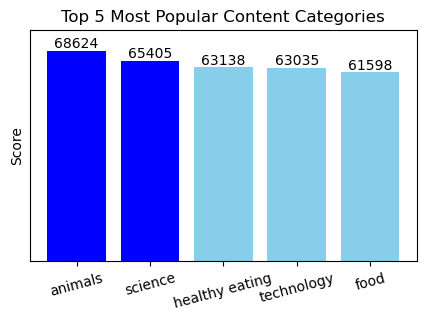

In [23]:
plt.figure(figsize=(5, 3))

bars = plt.bar(top5_cnt_cat['Content Category'], top5_cnt_cat['Score'], color=['blue', 'blue', 'skyblue', 'skyblue', 'skyblue'], edgecolor='none')

plt.title('Top 5 Most Popular Content Categories')
plt.xticks(rotation=15)
plt.ylabel('Score')
plt.ylim(0, max(top5_cnt_cat['Score']) * 1.1) #to leave space above the bars so that the score is conveniently shown
plt.yticks([])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.savefig('top5_categories_barplot.png', bbox_inches='tight')

plt.show()

Let's see a comparative analysis!

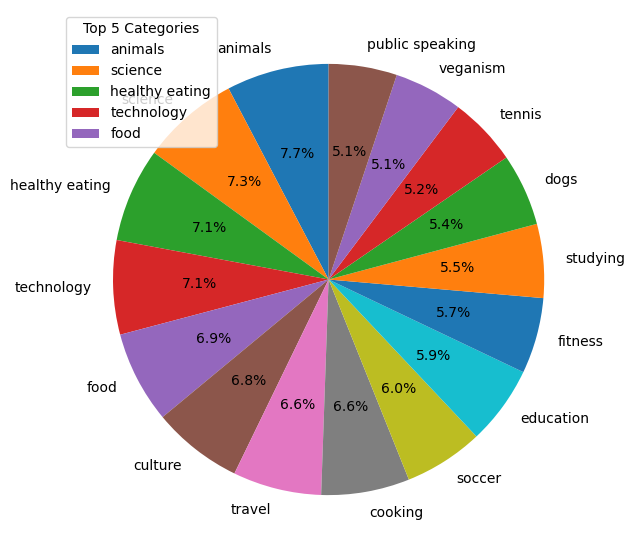

In [24]:
plt.figure(figsize=(8,7))
plt.pie(cnt_scores['Score'], labels=cnt_scores['Content Category'], autopct='%1.1f%%', startangle=90)

top5_legend_labels = cnt_scores['Content Category'].head(5)
plt.legend(top5_legend_labels, title='Top 5 Categories', loc='upper left')

plt.savefig('categories_piechart.png', bbox_inches='tight')

plt.show()

Distribution of scores (in percentage) across all 16 available content categories!

**Additionally, looking for the most active month using the data!**

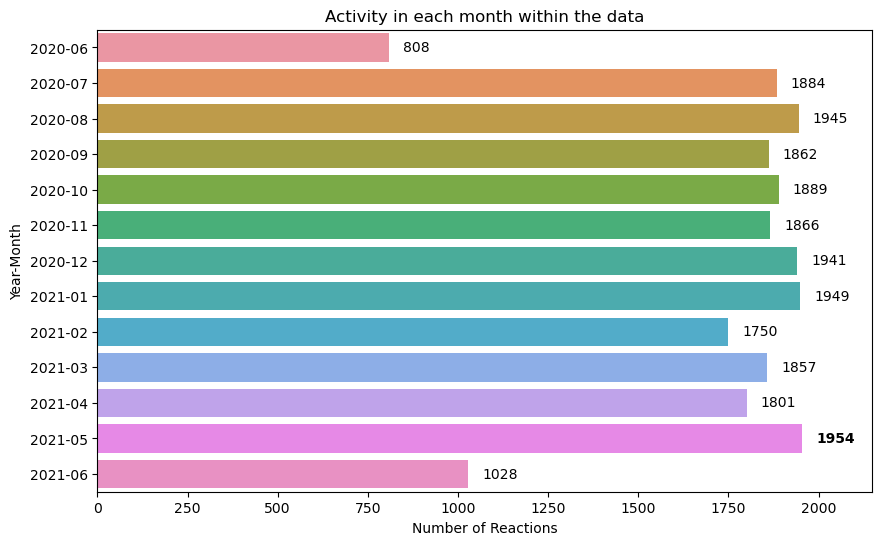

In [25]:
rct['Datetime'] = pd.to_datetime(rct['Datetime'])
rct['MonthYear'] = rct['Datetime'].dt.to_period('M')

frequency_counts = rct['MonthYear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frequency_counts.values, y=frequency_counts.index.astype(str).str.capitalize(), orient='h')

for i, v in enumerate(frequency_counts.values):
    fontweight = 'bold' if v == max(frequency_counts.values) else 'normal'
    ax.text(v + max(frequency_counts) * 0.02, i, str(v), color='black', va='center', fontweight=fontweight)

plt.title('Activity in each month within the data')

plt.xlabel('Number of Reactions')
plt.ylabel('Year-Month')
plt.xlim(0, max(frequency_counts) * 1.1)

plt.savefig('month_activity.png', bbox_inches='tight')
plt.show()

# Thanks!